<a href="https://colab.research.google.com/github/Aanjneya007/01_Customer-Behavior-Prediction_202401100300001/blob/main/Aanjneya_Nayak_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample data:
   total_spent  avg_purchase_value  visits_per_month      buyer_type
0  4007.982067          235.560678                 3  bargain_hunter
1  3117.968387          313.883912                13  bargain_hunter
2  4232.062646          122.280804                15  bargain_hunter
3   577.820196          470.747406                20   premium_buyer
4  2839.005107           23.207422                19  bargain_hunter

Checking for missing values:
total_spent           0
avg_purchase_value    0
visits_per_month      0
buyer_type            0
dtype: int64


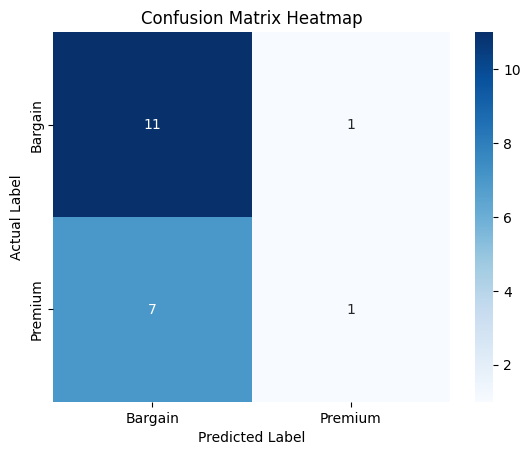


Evaluation Metrics:
Accuracy:  0.60
Precision: 0.50
Recall:    0.12


In [4]:
# Import necessary libraries
import pandas as pd #for reading and manipulating datasets (like CSV files).
from sklearn.model_selection import train_test_split # Imports the function to split the dataset into training and testing parts.
from sklearn.ensemble import RandomForestClassifier # Imports the Random Forest model, which is a type of machine learning algorithm used for classification.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score # Imports evaluation functions to check how good our model is (using accuracy, precision, recall, etc.).
import seaborn as sns # Imports plotting libraries to create a heatmap (confusion matrix visualization).
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
df = pd.read_csv('/content/customer_behavior.csv')

# Step 2: Show a few rows to understand the data
print("Sample data:")
print(df.head())

# Step 3: Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Step 4: Convert 'buyer_type' (your label) to numbers
df['buyer_type'] = df['buyer_type'].map({'bargain_hunter': 0, 'premium_buyer': 1})

# Step 5: Define features (X) and label (y)
X = df[['total_spent', 'avg_purchase_value', 'visits_per_month']]
y = df['buyer_type']

# Step 6: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict on test set
y_pred = model.predict(X_test)

# Step 9: Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bargain', 'Premium'], yticklabels=['Bargain', 'Premium'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Step 10: Print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
